In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Train Dataset

In [187]:
train=pd.read_csv('train_titanic.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [188]:
train.shape

(891, 12)

In [189]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Test Dataset

In [190]:
test=pd.read_csv('test_titanic.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [191]:
test.shape

(418, 11)

In [192]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [193]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [194]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [195]:
train=train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [196]:
test=test.drop(['Name', 'Ticket'], axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S


In [197]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [198]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


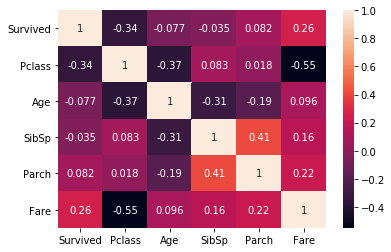

In [199]:
sns.heatmap(train.corr(), annot=True)

In [200]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [201]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S


In [202]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [203]:
def impute_nan(train, feat):
    m=train[feat].median()
    train[feat+'_new']=train[feat].fillna(m)

impute_nan(train, 'Age')


In [204]:
train.head(30)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_new
0,0,3,male,22.0,1,0,7.2500,NaN,S,22.0
1,1,1,female,38.0,1,0,71.2833,C85,C,38.0
2,1,3,female,26.0,0,0,7.9250,NaN,S,26.0
3,1,1,female,35.0,1,0,53.1000,C123,S,35.0
4,0,3,male,35.0,0,0,8.0500,NaN,S,35.0
5,0,3,male,NaN,0,0,8.4583,NaN,Q,28.0
6,0,1,male,54.0,0,0,51.8625,E46,S,54.0
7,0,3,male,2.0,3,1,21.0750,NaN,S,2.0
8,1,3,female,27.0,0,2,11.1333,NaN,S,27.0
9,1,2,female,14.0,1,0,30.0708,NaN,C,14.0


In [205]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [206]:
def impute_nan(test, feat):
    m=test[feat].median()
    test[feat+'_new']=test[feat].fillna(m)

impute_nan(test, 'Age')


In [207]:
test.head(20)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_new
0,892,3,male,34.5,0,0,7.8292,NaN,Q,34.5
1,893,3,female,47.0,1,0,7.0000,NaN,S,47.0
2,894,2,male,62.0,0,0,9.6875,NaN,Q,62.0
3,895,3,male,27.0,0,0,8.6625,NaN,S,27.0
4,896,3,female,22.0,1,1,12.2875,NaN,S,22.0
5,897,3,male,14.0,0,0,9.2250,NaN,S,14.0
6,898,3,female,30.0,0,0,7.6292,NaN,Q,30.0
7,899,2,male,26.0,1,1,29.0000,NaN,S,26.0
8,900,3,female,18.0,0,0,7.2292,NaN,C,18.0
9,901,3,male,21.0,2,0,24.1500,NaN,S,21.0


In [208]:
test.Fare.value_counts()

7.7500     21
26.0000    19
8.0500     17
13.0000    17
7.8958     11
           ..
9.3250      1
14.4583     1
15.0333     1
25.4667     1
21.0750     1
Name: Fare, Length: 169, dtype: int64

In [209]:
def impute_nan(test, feat):
    m=test[feat].replace(np.NaN, 7.7500)
    test[feat+'_new']=test[feat].fillna(m)

impute_nan(test, 'Fare')


In [210]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_new,Fare_new
0,892,3,male,34.5,0,0,7.8292,NaN,Q,34.5,7.8292
1,893,3,female,47.0,1,0,7.0000,NaN,S,47.0,7.0000
2,894,2,male,62.0,0,0,9.6875,NaN,Q,62.0,9.6875
3,895,3,male,27.0,0,0,8.6625,NaN,S,27.0,8.6625
4,896,3,female,22.0,1,1,12.2875,NaN,S,22.0,12.2875


In [211]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
Age_new          0
Fare_new         0
dtype: int64

In [212]:
test.drop(['Fare', 'Age'], axis=1)

,PassengerId,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Age_new,Fare_new
0,892,3,male,0,0,NaN,Q,34.5,7.8292
1,893,3,female,1,0,NaN,S,47.0,7.0000
2,894,2,male,0,0,NaN,Q,62.0,9.6875
3,895,3,male,0,0,NaN,S,27.0,8.6625
4,896,3,female,1,1,NaN,S,22.0,12.2875
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,0,0,NaN,S,27.0,8.0500
414,1306,1,female,0,0,C105,C,39.0,108.9000
415,1307,3,male,0,0,NaN,S,38.5,7.2500
416,1308,3,male,0,0,NaN,S,27.0,8.0500


In [213]:
train.drop(['Age'], axis=1)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_new
0,0,3,male,1,0,7.2500,NaN,S,22.0
1,1,1,female,1,0,71.2833,C85,C,38.0
2,1,3,female,0,0,7.9250,NaN,S,26.0
3,1,1,female,1,0,53.1000,C123,S,35.0
4,0,3,male,0,0,8.0500,NaN,S,35.0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,NaN,S,27.0
887,1,1,female,0,0,30.0000,B42,S,19.0
888,0,3,female,1,2,23.4500,NaN,S,28.0
889,1,1,male,0,0,30.0000,C148,C,26.0


In [214]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
Age_new       0
dtype: int64

In [215]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [216]:
mode=train.Embarked.mode()

In [217]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [218]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_new
0,0,3,male,22.0,1,0,7.2500,NaN,S,22.0
1,1,1,female,38.0,1,0,71.2833,C85,C,38.0
2,1,3,female,26.0,0,0,7.9250,NaN,S,26.0
3,1,1,female,35.0,1,0,53.1000,C123,S,35.0
4,0,3,male,35.0,0,0,8.0500,NaN,S,35.0


In [219]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
Age_new       0
dtype: int64

In [220]:
df=train.drop(['Age'], axis=1)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_new
0,0,3,male,1,0,7.2500,NaN,S,22.0
1,1,1,female,1,0,71.2833,C85,C,38.0
2,1,3,female,0,0,7.9250,NaN,S,26.0
3,1,1,female,1,0,53.1000,C123,S,35.0
4,0,3,male,0,0,8.0500,NaN,S,35.0


In [221]:
sex=pd.get_dummies(df['Sex'], drop_first=True)
embark=pd.get_dummies(df['Embarked'], drop_first=True)

In [222]:
df.drop(['Sex', 'Embarked'], axis=1, inplace=True)
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Cabin,Age_new
0,0,3,1,0,7.2500,NaN,22.0
1,1,1,1,0,71.2833,C85,38.0
2,1,3,0,0,7.9250,NaN,26.0
3,1,1,1,0,53.1000,C123,35.0
4,0,3,0,0,8.0500,NaN,35.0


In [223]:
df=pd.concat([df, sex, embark], axis=1)
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Cabin,Age_new,male,Q,S
0,0,3,1,0,7.2500,NaN,22.0,1,0,1
1,1,1,1,0,71.2833,C85,38.0,0,0,0
2,1,3,0,0,7.9250,NaN,26.0,0,0,1
3,1,1,1,0,53.1000,C123,35.0,0,0,1
4,0,3,0,0,8.0500,NaN,35.0,1,0,1


In [224]:
df['Cabin']=df['Cabin'].fillna('Missing')
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Cabin,Age_new,male,Q,S
0,0,3,1,0,7.2500,Missing,22.0,1,0,1
1,1,1,1,0,71.2833,C85,38.0,0,0,0
2,1,3,0,0,7.9250,Missing,26.0,0,0,1
3,1,1,1,0,53.1000,C123,35.0,0,0,1
4,0,3,0,0,8.0500,Missing,35.0,1,0,1


In [225]:
df['Cabin']=df['Cabin'].astype(str).str[0]
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Cabin,Age_new,male,Q,S
0,0,3,1,0,7.2500,M,22.0,1,0,1
1,1,1,1,0,71.2833,C,38.0,0,0,0
2,1,3,0,0,7.9250,M,26.0,0,0,1
3,1,1,1,0,53.1000,C,35.0,0,0,1
4,0,3,0,0,8.0500,M,35.0,1,0,1


In [226]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [227]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [228]:
df.groupby(['Cabin'])['Survived'].mean().sort_values()

Cabin
T    0.000000
M    0.299854
A    0.466667
G    0.500000
C    0.593220
F    0.615385
B    0.744681
E    0.750000
D    0.757576
Name: Survived, dtype: float64

In [229]:
ordinal_label=df.groupby(['Cabin'])['Survived'].mean().sort_values().index

In [230]:
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [231]:
df['Cabin-ordinal']=df['Cabin'].map(g)
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Cabin,Age_new,male,Q,S,Cabin-ordinal
0,0,3,1,0,7.2500,M,22.0,1,0,1,1
1,1,1,1,0,71.2833,C,38.0,0,0,0,4
2,1,3,0,0,7.9250,M,26.0,0,0,1,1
3,1,1,1,0,53.1000,C,35.0,0,0,1,4
4,0,3,0,0,8.0500,M,35.0,1,0,1,1


In [232]:
df.drop(['Cabin'], axis=1, inplace=True)
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Age_new,male,Q,S,Cabin-ordinal
0,0,3,1,0,7.2500,22.0,1,0,1,1
1,1,1,1,0,71.2833,38.0,0,0,0,4
2,1,3,0,0,7.9250,26.0,0,0,1,1
3,1,1,1,0,53.1000,35.0,0,0,1,4
4,0,3,0,0,8.0500,35.0,1,0,1,1


In [233]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_new,Fare_new
0,892,3,male,34.5,0,0,7.8292,NaN,Q,34.5,7.8292
1,893,3,female,47.0,1,0,7.0000,NaN,S,47.0,7.0000
2,894,2,male,62.0,0,0,9.6875,NaN,Q,62.0,9.6875
3,895,3,male,27.0,0,0,8.6625,NaN,S,27.0,8.6625
4,896,3,female,22.0,1,1,12.2875,NaN,S,22.0,12.2875


In [234]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
Age_new          0
Fare_new         0
dtype: int64

In [235]:
sex=pd.get_dummies(test['Sex'], drop_first=True)
embark=pd.get_dummies(test['Embarked'], drop_first=True)

In [236]:
test.drop(['Sex', 'Embarked', 'Age', 'Fare'], axis=1, inplace=True)
test.head()

,PassengerId,Pclass,SibSp,Parch,Cabin,Age_new,Fare_new
0,892,3,0,0,NaN,34.5,7.8292
1,893,3,1,0,NaN,47.0,7.0000
2,894,2,0,0,NaN,62.0,9.6875
3,895,3,0,0,NaN,27.0,8.6625
4,896,3,1,1,NaN,22.0,12.2875


In [237]:
test=pd.concat([test, sex, embark], axis=1)
test.head()

,PassengerId,Pclass,SibSp,Parch,Cabin,Age_new,Fare_new,male,Q,S
0,892,3,0,0,NaN,34.5,7.8292,1,1,0
1,893,3,1,0,NaN,47.0,7.0000,0,0,1
2,894,2,0,0,NaN,62.0,9.6875,1,1,0
3,895,3,0,0,NaN,27.0,8.6625,1,0,1
4,896,3,1,1,NaN,22.0,12.2875,0,0,1


In [238]:
test['Cabin']=test['Cabin'].fillna('Missing')
test.head()

,PassengerId,Pclass,SibSp,Parch,Cabin,Age_new,Fare_new,male,Q,S
0,892,3,0,0,Missing,34.5,7.8292,1,1,0
1,893,3,1,0,Missing,47.0,7.0000,0,0,1
2,894,2,0,0,Missing,62.0,9.6875,1,1,0
3,895,3,0,0,Missing,27.0,8.6625,1,0,1
4,896,3,1,1,Missing,22.0,12.2875,0,0,1


In [239]:
test['Cabin']=test['Cabin'].astype(str).str[0]
test.head()

,PassengerId,Pclass,SibSp,Parch,Cabin,Age_new,Fare_new,male,Q,S
0,892,3,0,0,M,34.5,7.8292,1,1,0
1,893,3,1,0,M,47.0,7.0000,0,0,1
2,894,2,0,0,M,62.0,9.6875,1,1,0
3,895,3,0,0,M,27.0,8.6625,1,0,1
4,896,3,1,1,M,22.0,12.2875,0,0,1


In [240]:
test['Cabin'].unique()

array(['M', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [241]:
test['Cabin'].value_counts()

M    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

In [242]:
#g={'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}
#g

In [243]:
m={'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}
m

{'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [244]:
test['Cabin-ordinal']=test['Cabin'].map(m)
test.head()

,PassengerId,Pclass,SibSp,Parch,Cabin,Age_new,Fare_new,male,Q,S,Cabin-ordinal
0,892,3,0,0,M,34.5,7.8292,1,1,0,1
1,893,3,1,0,M,47.0,7.0000,0,0,1,1
2,894,2,0,0,M,62.0,9.6875,1,1,0,1
3,895,3,0,0,M,27.0,8.6625,1,0,1,1
4,896,3,1,1,M,22.0,12.2875,0,0,1,1


In [245]:
test.drop(['Cabin'], axis=1, inplace=True)
test.head()

,PassengerId,Pclass,SibSp,Parch,Age_new,Fare_new,male,Q,S,Cabin-ordinal
0,892,3,0,0,34.5,7.8292,1,1,0,1
1,893,3,1,0,47.0,7.0000,0,0,1,1
2,894,2,0,0,62.0,9.6875,1,1,0,1
3,895,3,0,0,27.0,8.6625,1,0,1,1
4,896,3,1,1,22.0,12.2875,0,0,1,1


In [246]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Age_new,male,Q,S,Cabin-ordinal
0,0,3,1,0,7.2500,22.0,1,0,1,1
1,1,1,1,0,71.2833,38.0,0,0,0,4
2,1,3,0,0,7.9250,26.0,0,0,1,1
3,1,1,1,0,53.1000,35.0,0,0,1,4
4,0,3,0,0,8.0500,35.0,1,0,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0C99E090>,
      dtype=object)

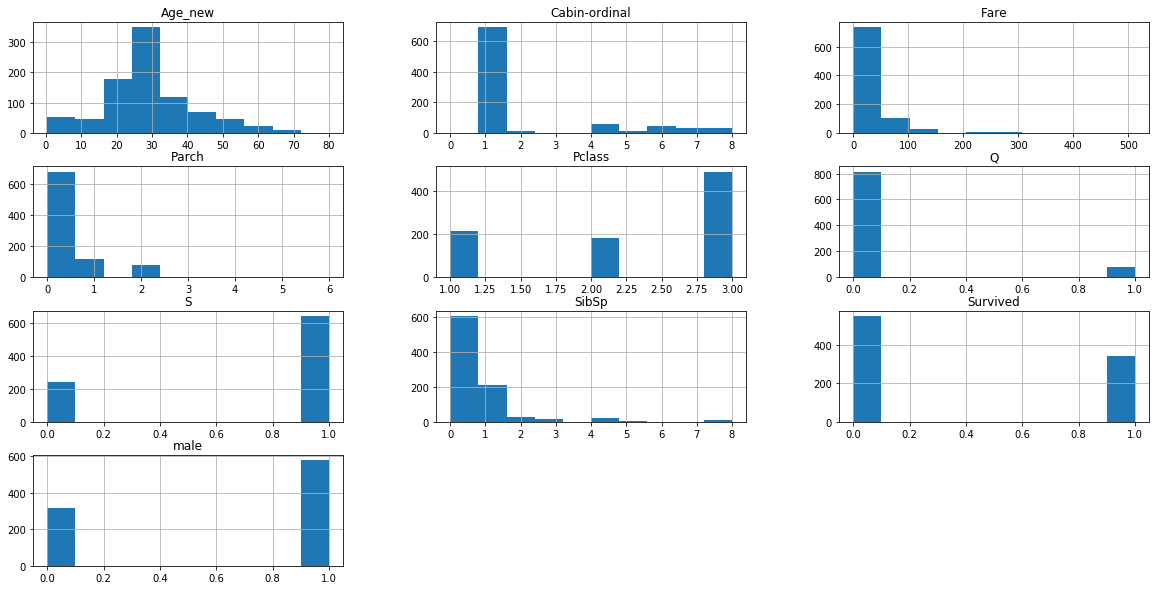

In [247]:
df.hist(figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0C9B0670>,
      dtype=object)

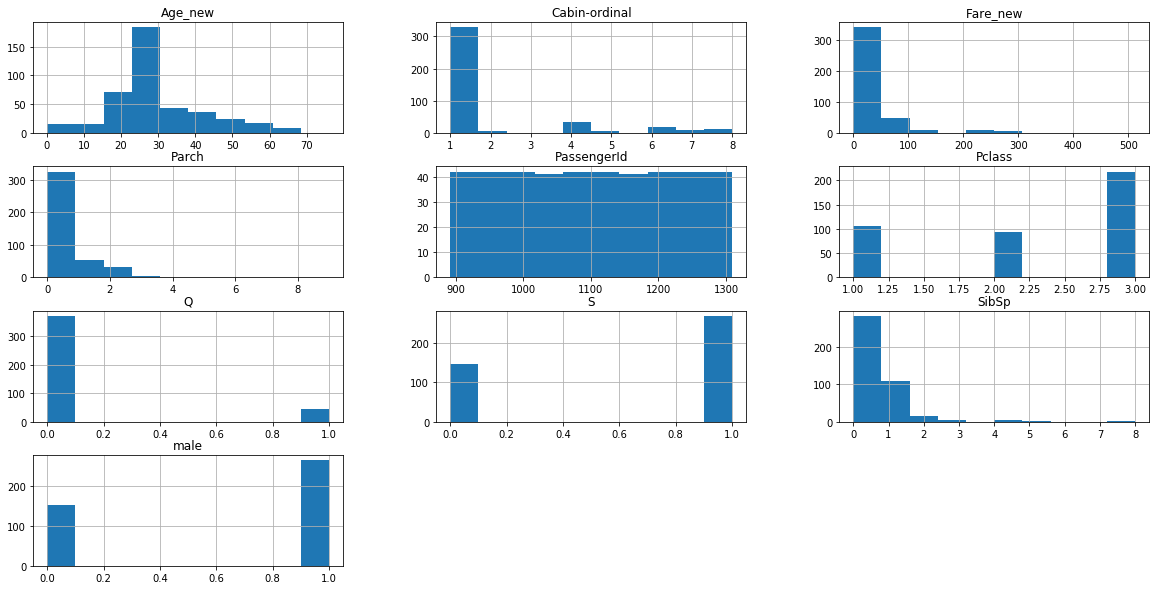

In [248]:
test.hist(figsize=(20,10))

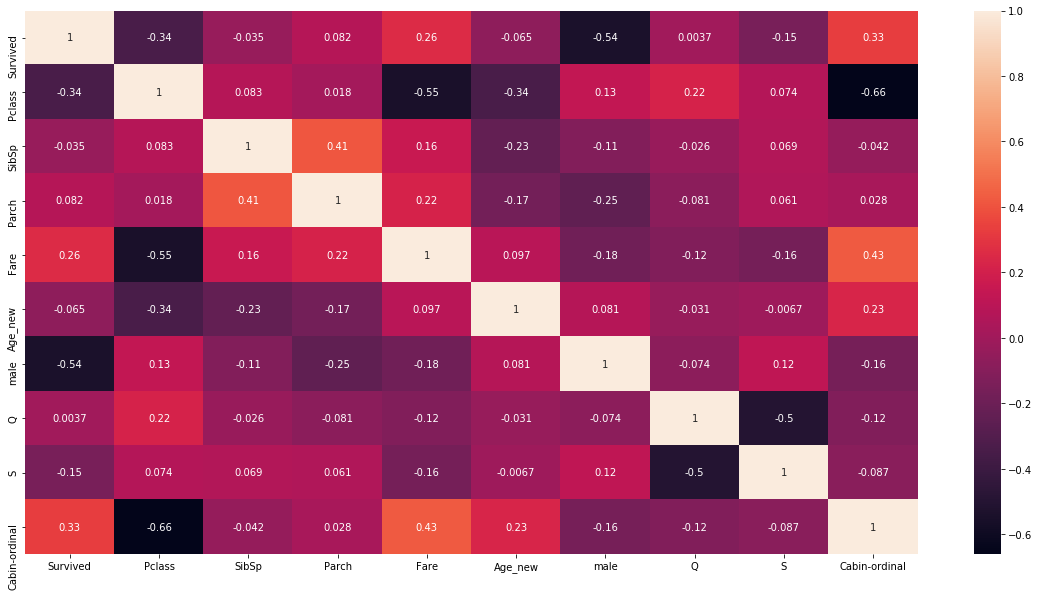

In [249]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

In [250]:
df.isnull().sum()

Survived         0
Pclass           0
SibSp            0
Parch            0
Fare             0
Age_new          0
male             0
Q                0
S                0
Cabin-ordinal    0
dtype: int64

In [251]:
test.isnull().sum()

PassengerId      0
Pclass           0
SibSp            0
Parch            0
Age_new          0
Fare_new         0
male             0
Q                0
S                0
Cabin-ordinal    0
dtype: int64

In [252]:
test['Fare']=test['Fare_new']

In [253]:
test.head()

,PassengerId,Pclass,SibSp,Parch,Age_new,Fare_new,male,Q,S,Cabin-ordinal,Fare
0,892,3,0,0,34.5,7.8292,1,1,0,1,7.8292
1,893,3,1,0,47.0,7.0000,0,0,1,1,7.0000
2,894,2,0,0,62.0,9.6875,1,1,0,1,9.6875
3,895,3,0,0,27.0,8.6625,1,0,1,1,8.6625
4,896,3,1,1,22.0,12.2875,0,0,1,1,12.2875


In [254]:
test.drop(['Fare_new'], axis=1, inplace=True)
test.head()

,PassengerId,Pclass,SibSp,Parch,Age_new,male,Q,S,Cabin-ordinal,Fare
0,892,3,0,0,34.5,1,1,0,1,7.8292
1,893,3,1,0,47.0,0,0,1,1,7.0000
2,894,2,0,0,62.0,1,1,0,1,9.6875
3,895,3,0,0,27.0,1,0,1,1,8.6625
4,896,3,1,1,22.0,0,0,1,1,12.2875


In [255]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['Fare', 'Age_new', 'Pclass', 'SibSp', 'Parch', 'Cabin-ordinal']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [256]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Age_new,male,Q,S,Cabin-ordinal
0,0,0.827377,0.432793,-0.473674,-0.502445,-0.565736,1,0,1,-0.494813
1,1,-1.566107,0.432793,-0.473674,0.786845,0.663861,0,0,0,0.960231
2,1,0.827377,-0.474545,-0.473674,-0.488854,-0.258337,0,0,1,-0.494813
3,1,-1.566107,0.432793,-0.473674,0.420730,0.433312,0,0,1,0.960231
4,0,0.827377,-0.474545,-0.473674,-0.486337,0.433312,1,0,1,-0.494813


In [257]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['Fare', 'Age_new', 'Pclass', 'SibSp', 'Parch', 'Cabin-ordinal']
test[columns_to_scale] = standardScaler.fit_transform(test[columns_to_scale])

In [258]:
test.head()

,PassengerId,Pclass,SibSp,Parch,Age_new,male,Q,S,Cabin-ordinal,Fare
0,892,0.873482,-0.499470,-0.400248,0.386231,1,1,0,-0.478344,-0.497063
1,893,0.873482,0.616992,-0.400248,1.371370,0,0,1,-0.478344,-0.511926
2,894,-0.315819,-0.499470,-0.400248,2.553537,1,1,0,-0.478344,-0.463754
3,895,0.873482,-0.499470,-0.400248,-0.204852,1,0,1,-0.478344,-0.482127
4,896,0.873482,0.616992,0.619896,-0.598908,0,0,1,-0.478344,-0.417151


In [259]:
test.shape

(418, 10)

In [260]:
x_train=df.drop(['Survived'], axis = 1)
y_train=df['Survived']
x_test=test.drop(['PassengerId'], axis=1)
x_train.shape, y_train.shape, x_test.shape

((891, 9), (891,), (418, 9))

In [261]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
acc_rate=[]
for i in range(1,40):
    clf = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(clf, x_train, y_train, cv=10)
    acc_rate.append(score.mean())

Text(0, 0.5, 'accuracy rate')

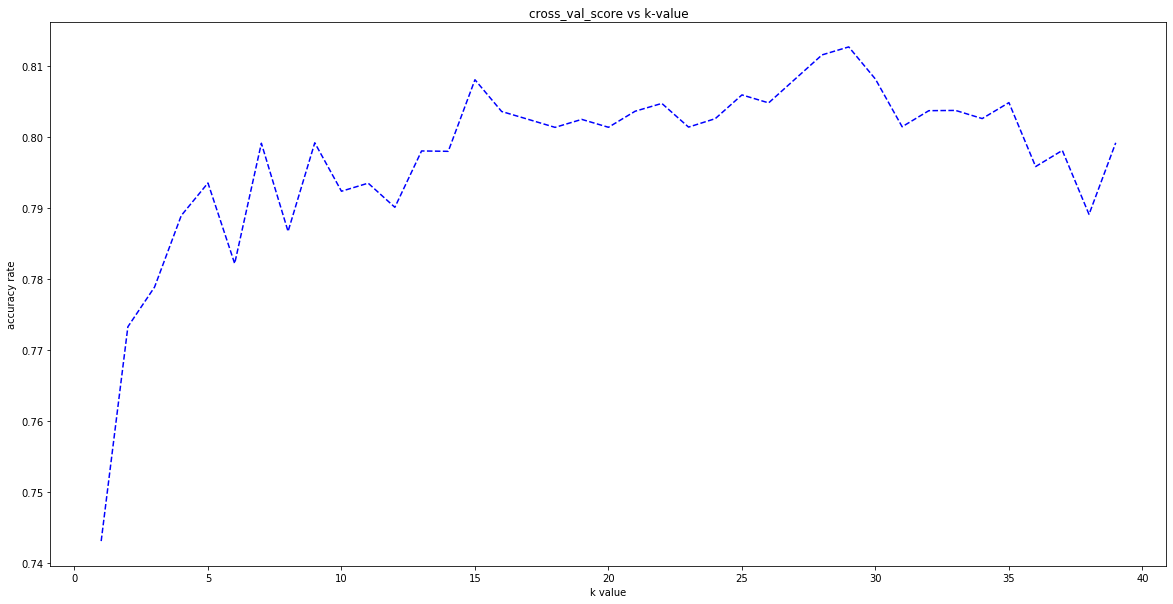

In [262]:
plt.figure(figsize=(20,10))
plt.plot(range(1,40), acc_rate, color='blue', linestyle='dashed')
plt.title("cross_val_score vs k-value")
plt.xlabel("k value")
plt.ylabel("accuracy rate")

In [271]:
from sklearn.neighbors import KNeighborsClassifier 
clf = KNeighborsClassifier(n_neighbors=29) 
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [272]:
acc_knn = clf.score(x_train, y_train)
acc_knn

0.813692480359147

In [273]:
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression(solver='liblinear') 
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [274]:
acc_Log = clf.score(x_train, y_train)
acc_Log

0.8148148148148148

In [275]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=1)
#clf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=2, random_state=1)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc_Ran = clf.score(x_train, y_train)
acc_Ran

0.9831649831649831

In [268]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_knn
    })
submission.to_csv('output1.csv', index=False)

In [269]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_log
    })
submission.to_csv('output2.csv', index=False)

In [270]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_ran
    })
submission.to_csv('output3.csv', index=False)